In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("data/airlines_flights.csv")

In [13]:
print(df.dtypes)
df["duration"] = df["duration"].astype(int)
print(df.dtypes)

index                 int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object
index                int64
airline             object
flight              object
source_city         object
departure_time      object
stops               object
arrival_time        object
destination_city    object
class               object
duration             int64
days_left            int64
price                int64
dtype: object


In [9]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object' or df[col].nunique() < 20]
print(cat_cols)

['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']



airline value counts:
airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64


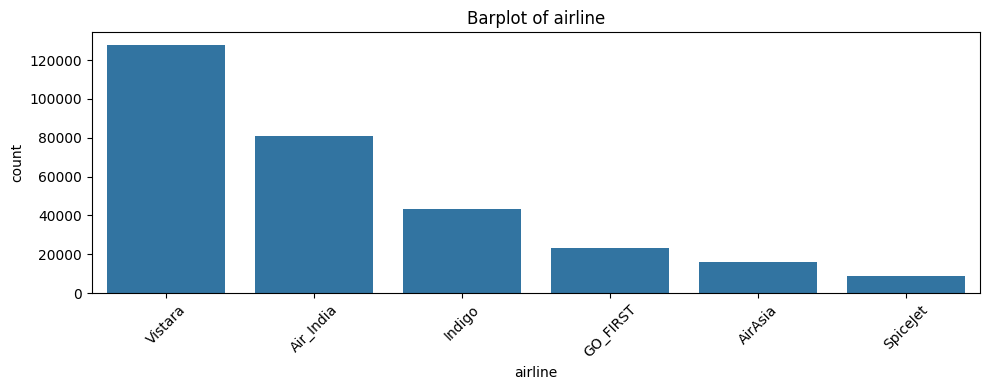


source_city value counts:
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64


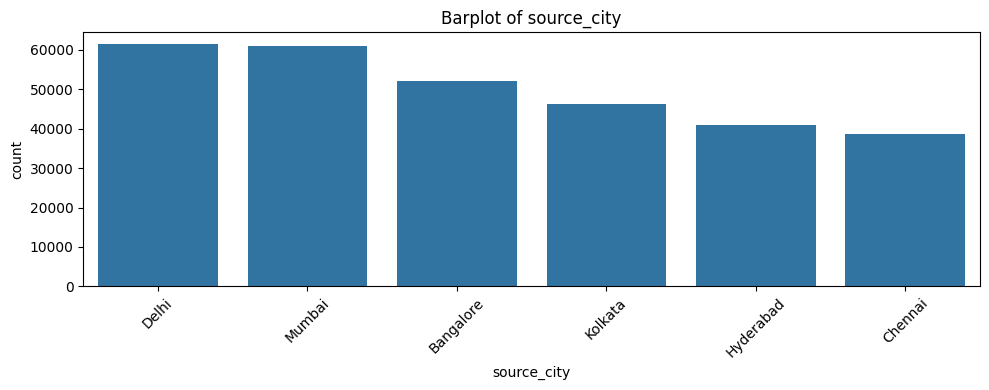


destination_city value counts:
destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64


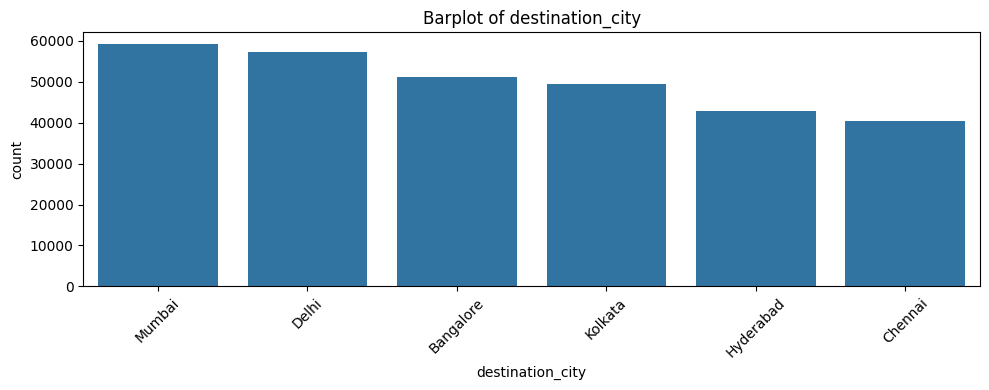


class value counts:
class
Economy     206666
Business     93487
Name: count, dtype: int64


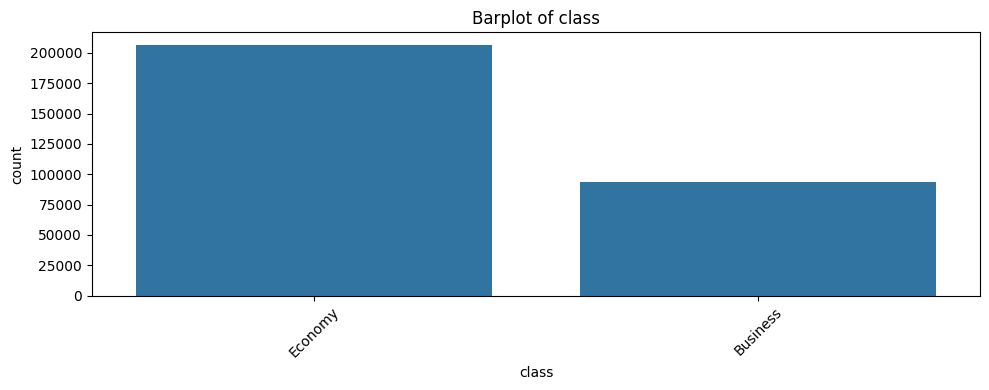


stops value counts:
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64


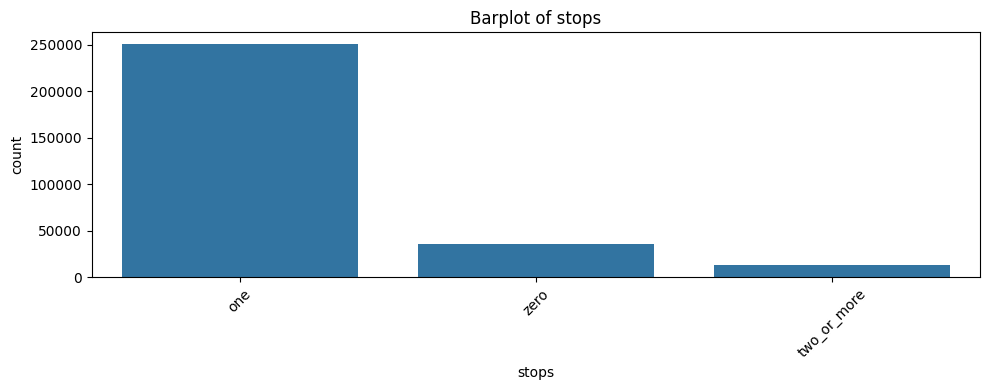


departure_time value counts:
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64


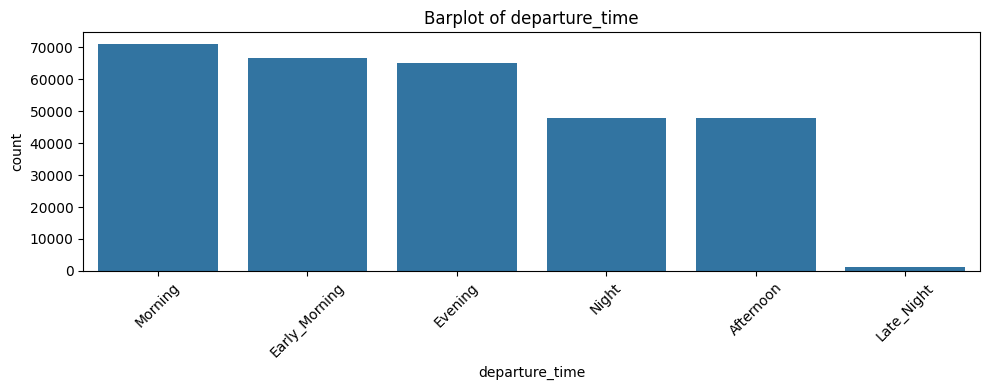

In [15]:
categorical_cols = ['airline', 'source_city', 'destination_city', 'class', 'stops', 'departure_time']

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())

    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Barplot of {col}')
    plt.tight_layout()
    plt.show()



Stats for price:
count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64


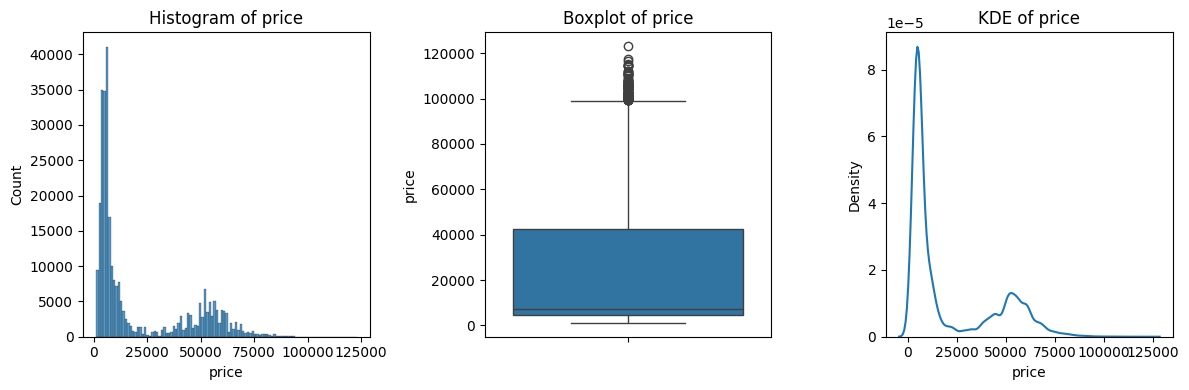


Stats for days_left:
count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64


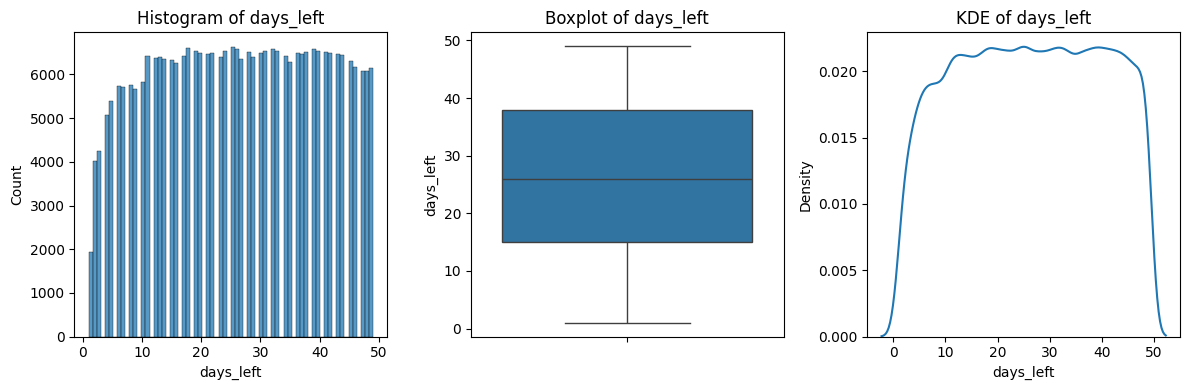

In [19]:
continuous_cols = ['price', 'days_left']

for col in continuous_cols:
    print(f"\nStats for {col}:")
    print(df[col].describe())

    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[col], kde=False)
    plt.title(f'Histogram of {col}')
    
    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    
    # KDE Plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(df[col])
    plt.title(f'KDE of {col}')
    
    plt.tight_layout()
    plt.show()


In [20]:
print(df[continuous_cols].skew())

price        1.061377
days_left   -0.035464
dtype: float64


In [ ]:
# if mean > median then the column is skewed
print("Mean:", df['price'].mean())
print("Median:", df['price'].median())

Mean: 20889.660523133203
Median: 7425.0


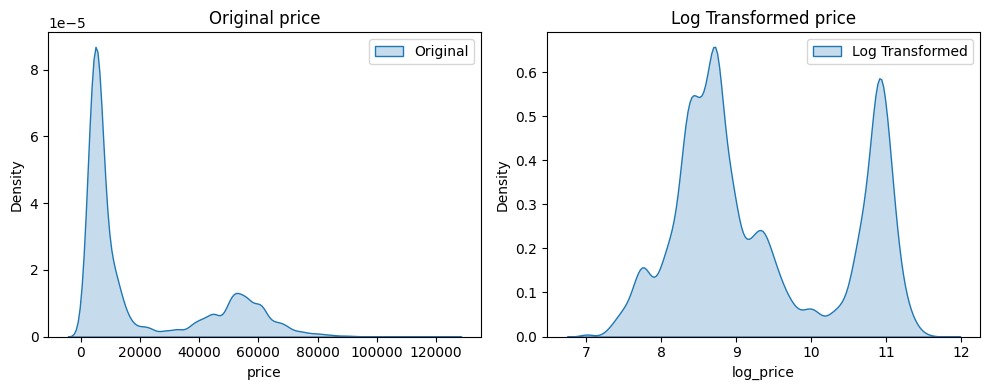

In [28]:
for col in continuous_cols:
    if abs(df[col].skew()) > 1:
        df[f'log_{col}'] = np.log1p(df[col])  # log(1 + x)

        # Plot transformed vs original
        plt.figure(figsize=(10, 4))

        # Plot original KDE
        plt.subplot(1, 2, 1)
        sns.kdeplot(df[col], label='Original', fill=True)
        plt.title(f'Original {col}')
        plt.legend()

        # Plot log-transformed KDE
        plt.subplot(1, 2, 2)
        sns.kdeplot(df[f'log_{col}'], label='Log Transformed', fill=True)
        plt.title(f'Log Transformed {col}')
        plt.legend()

        plt.tight_layout()
        plt.show()